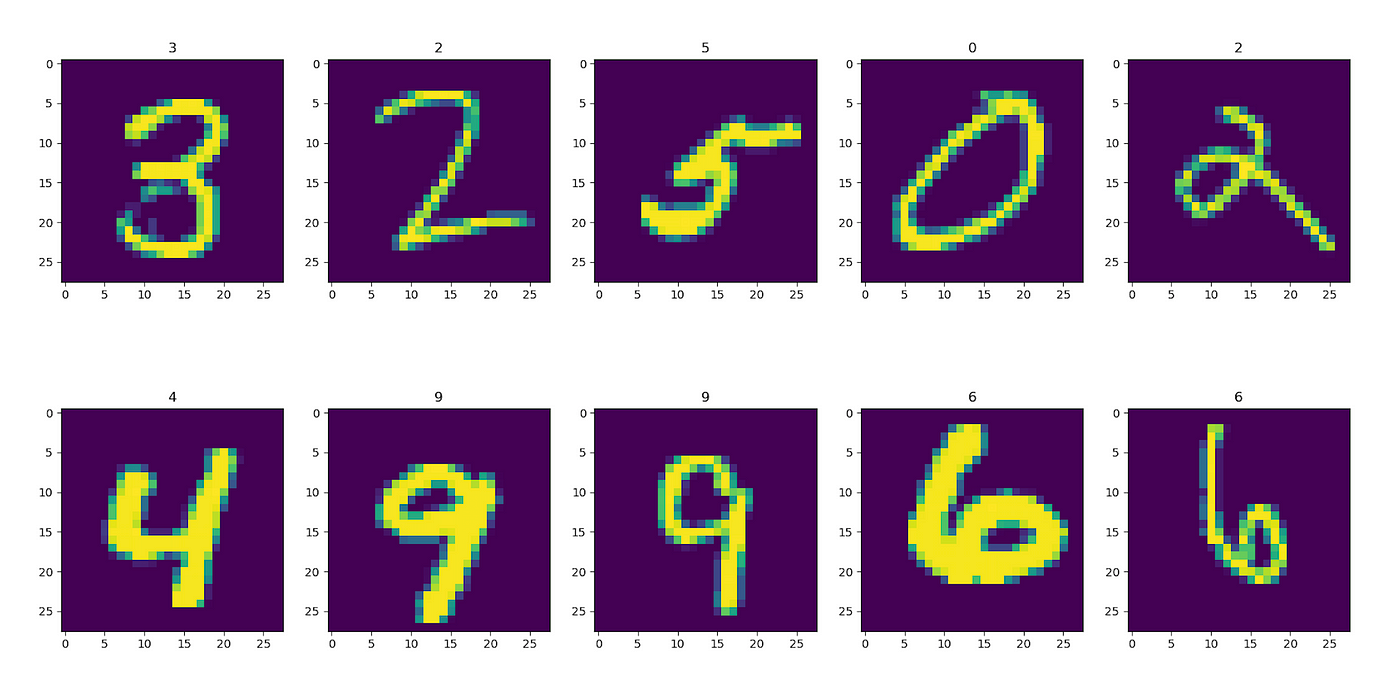
The digits recognition dataset is a popular machine learning dataset used for training and testing image classification algorithms. The dataset consists of a collection of images of handwritten digits (0 to 9), each image of size 8x8 pixels. There are a total of 1797 images in the dataset, with each image labeled with the corresponding digit it represents.

The dataset is often used as a benchmark dataset for image classification tasks, and many popular machine learning libraries and frameworks, such as scikit-learn and TensorFlow, provide built-in functionality for loading and working with the dataset.

Some common use cases for the digits recognition dataset include training and testing machine learning models for handwritten digit recognition, exploring various image classification techniques, and experimenting with data preprocessing and feature engineering methods.

In [1]:
 # Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [4]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


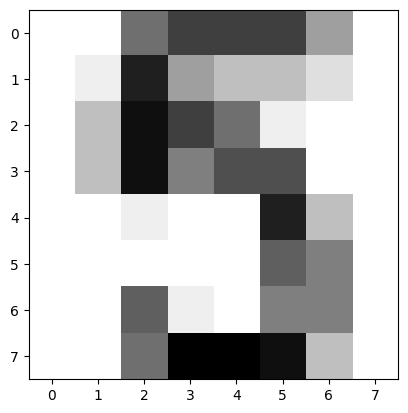

In [5]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [6]:
digits.images[1010]

array([[ 0.,  0.,  9., 12., 12., 12.,  6.,  0.],
       [ 0.,  1., 14.,  6.,  4.,  4.,  2.,  0.],
       [ 0.,  4., 15., 12.,  9.,  1.,  0.,  0.],
       [ 0.,  4., 15.,  8., 11., 11.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., 14.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10.,  8.,  0.],
       [ 0.,  0., 10.,  1.,  0.,  8.,  8.,  0.],
       [ 0.,  0.,  9., 16., 16., 15.,  4.,  0.]])

In [7]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)



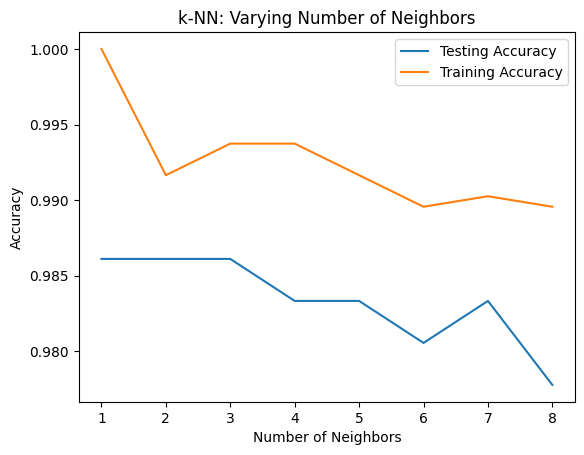

In [8]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [9]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors= 3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)


# Print the accuracy
print(knn.score(X_test, y_test))


0.9861111111111112


In [10]:
# Save the model to a file using pickle
with open('model/digits_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [ ]:
 # Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors= 3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)


# Print the accuracy
print(knn.score(X_test, y_test))

# Save the model to a file using pickle
with open('model/digits_model.pkl', 'wb') as f:
    pickle.dump(knn, f)